# Exercise 1 : Simple Substitution Cipher

In [55]:
phrase = str(input("Enter sentence to encrypt: "))
shift = int(input("Enter shift value: "))%26
encodedPhrase = ""
for c in phrase:
    if c.islower() == True:
        c_enc = (ord(c) - ord('a') + shift) % 26 + ord('a')
        encodedPhrase += chr(c_enc)
    elif c.isupper() == True:
        c_enc = (ord(c) - ord('A') + shift) % 26 + ord('A')
        encodedPhrase += chr(c_enc)
    else:
        encodedPhrase += c
        
print("The encoded phrase is: ",encodedPhrase)

Enter sentence to encrypt: Mayday! Mayday!
Enter shift value: 4
The encoded phrase is:  Qechec! Qechec!


# Exercise 2 : Breaking a Simple Substitution Cipher

In [56]:
import collections
import operator

cipher_phrase = str(input("Enter sentence to decrypt: "))
print()

d = collections.defaultdict(int)
for c in cipher_phrase:
    d[c] += 1

print("Using cryptanalysis...")
for c in sorted(d, key=d.get, reverse=True):
    print('Letter %s %6d' % (c, d[c]))
    
x = sorted(d.items(), key=operator.itemgetter(1), reverse=True)

crypto_shifts = []
z = 0
while z < int(len(d)/2) + 1: # Iterate through half the number of unique letters plus 1
    if x[z][0] != ' ': # If not a space symbol then calculate distance from 'e'
        dist = ord('e') - ord(x[z][0])
        crypto_shifts.append(dist) 
    z += 1

print()
print("Assigning the following distances from the letter 'e' as the shift:")
print(crypto_shifts)
print()
    
# Print phrase with e
for shift in crypto_shifts:
    decodedPhrase = ""
    for c in cipher_phrase:        
        if c.islower() == True:
            c_enc = (ord(c) - ord('a') + shift) % 26 + ord('a')
            decodedPhrase += chr(c_enc)
        elif c.isupper() == True:
            c_enc = (ord(c) - ord('A') + shift) % 26 + ord('A')
            decodedPhrase += chr(c_enc)
        else:
            decodedPhrase += c
    print("offset is " + str((26 - shift)%26) + ": - "+decodedPhrase)

Enter sentence to decrypt: drpfeerzjv tfcfivu sveq z gljy dzirtcv nyzgj

Using cryptanalysis...
Letter        6
Letter z      4
Letter v      4
Letter r      3
Letter f      3
Letter e      3
Letter j      3
Letter d      2
Letter t      2
Letter c      2
Letter i      2
Letter g      2
Letter y      2
Letter p      1
Letter u      1
Letter s      1
Letter q      1
Letter l      1
Letter n      1

Assigning the following distances from the letter 'e' as the shift:
[-21, -17, -13, -1, 0, -5, 1, -15, 2]

offset is 21: - iwukjjweoa ykhknaz xajv e lqod ienwyha sdelo
offset is 17: - mayonnaise colored benz i push miracle whips
offset is 13: - qecsrremwi gspsvih fird m tywl qmvegpi almtw
offset is 1: - cqoeddqyiu sebehut rudp y fkix cyhqsbu mxyfi
offset is 0: - drpfeerzjv tfcfivu sveq z gljy dzirtcv nyzgj
offset is 5: - ymkazzmueq oaxadqp nqzl u bget yudmoxq itube
offset is 25: - esqgffsakw ugdgjwv twfr a hmkz eajsudw ozahk
offset is 15: - ocaqppckug eqnqtgf dgpb k rwuj oktceng yjkru
offset 

The second output is the right one with offset of 17.

# Exercise 3 : AES

## Original image

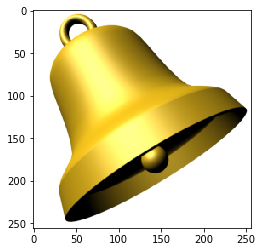

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.ndimage import imread
import numpy as np
from collections import Counter
import pandas as pd
import os
image = imread('download.jpg')
plt.imshow(image);

In [58]:
from Crypto.Cipher import AES

key = '0123456789abcdef'
aes = AES.new(key)

text = 'testing'
addition = 16 - len(text) % 16
text += ' ' * addition

ciphertext = aes.encrypt(text)

aes.decrypt(ciphertext)

b'testing         '

## ECB mode

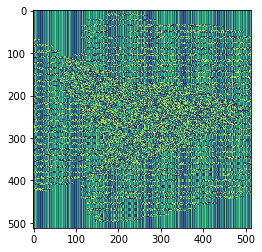

In [59]:
key = '0123456789abcdef'
aes = AES.new(key, mode=AES.MODE_ECB)

encrypterd = aes.encrypt(image)
encrypterd = np.fromstring(encrypterd, dtype=np.int8).reshape((512, 512)
plt.imshow(encrypterd);

## CBC mode

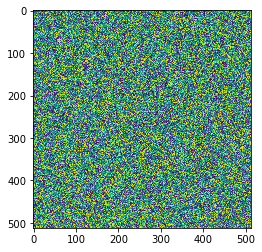

In [60]:
key = '0123456789abcdef'
IV = 16 * '\x00'
aes = AES.new(key, mode=AES.MODE_CBC, IV=IV)

encrypterd = aes.encrypt(image)
encrypterd = np.fromstring(encrypterd, dtype=np.int8).reshape((512, 512))
plt.imshow(encrypterd);

## CTR mode

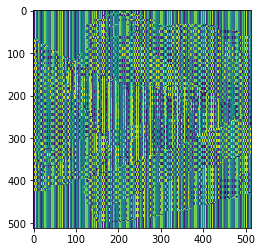

In [61]:
counter = os.urandom(16)
key = os.urandom(32)  # 256 bits key

key = '0123456789abcdef'
IV = 16 * '\x00'
aes = AES.new(key, mode=AES.MODE_CTR, IV=IV, counter=lambda: counter)

encrypterd = aes.encrypt(image)
encrypterd = np.fromstring(encrypterd, dtype=np.int8).reshape((512, 512))
plt.imshow(encrypterd);

With ECB and CTR mode, you can tell some shape after the image was encrypted. With CBC, it looks like pure static, so it seems that CBC is the best option for encrypting images.